# Relating the span of subjects to the articles authors


Author(s) - Mike Talbot  
Date Created - 17/12/18  
Date Last Modified - 17/12/18  
GitRepo - [LINK](https://github.com/miketalbotbox/MDM_Interdisciplinarity "Super GitHub Repo Yay!")


UTILITY:
This process has three main stages, the first is to pull the list of authors from the articles.
Then compare the Articles authors to the list of authors in the authors csv.
Finally see what subjects are studied by each author
Calculate a spread of subjects using the heat map weighting previously calculated :)

In [1]:
"""
Cool fresh imports all the way from the internets to make the magic happen!
"""
import pandas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from SubjectSearch import CreateGraph, FindPerson

In [2]:
"""
Bringing in the csv files required
"""

ArticleCSV = pandas.read_csv("articles.csv")
AuthorsCSV = pandas.read_csv("authors.csv")

In [3]:
"""
Separating out the main headings required
"""

Article_Authors = ArticleCSV["Author(s) ID"]
Article_Authors = Article_Authors[0:100]
Authors_ID_Num = AuthorsCSV["Auth-ID"]
Authors_Subject = AuthorsCSV["Subject Area"]
#Authors_Subject.head()

0    Physics and Astronomy\nMathematics\nEngineerin...
1    Physics and Astronomy\nMathematics\nEngineerin...
2    Physics and Astronomy\nEngineering\nMathematic...
3    Medicine\nBiochemistry, Genetics and Molecular...
4    Physics and Astronomy\nEngineering\nMathematic...
Name: Subject Area, dtype: object

In [4]:
"""
Handling the Article_Authors List to be a list of lists containing
the authors rather than a list containing a single string with all the 
authors within it

Addendum:
List items are converted into an int, as then comparisons between int
and int will be far quicker and damn we have a lot of data to compare!
"""
#print(len(Article_Authors.index))
List_of_Strings = [0]*(len(Article_Authors.index))
#print(List_of_Strings)

i = 0
for Long_String in Article_Authors:
    List_of_Strings[i] = Long_String.split(';')
    if '' in List_of_Strings[i]:
        List_of_Strings[i].remove('')
    for String in List_of_Strings[i]: ### Loop to make 
        Integer = int(String)
        Const = List_of_Strings[i]
        Const[Const.index(String)] = Integer
    i += 1
    """if i%100 == 0:
        print(i)"""
#print(type(List_of_Strings[0][0]))
List_of_IDs = List_of_Strings ## Nicer Name

['Physics and Astronomy', 'Mathematics', 'Engineering', 'Multidisciplinary', 'Earth and Planetary Sciences', 'Energy', 'Computer Science', 'Medicine', 'Biochemistry, Genetics and Molecular Biology', 'Pharmacology, Toxicology and Pharmaceutics', 'Social Sciences', 'Neuroscience', 'Nursing', 'Psychology', 'Chemistry', 'Agricultural and Biological Sciences', 'Immunology and Microbiology', 'Health Professions', 'Dentistry', 'Economics, Econometrics and Finance', 'Decision Sciences', 'Arts and Humanities', 'Environmental Science', 'Veterinary', 'Materials Science', 'Chemical Engineering', 'Business, Management and Accounting', 'nan']


C:\Users\micha\Anaconda3\envs\myenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


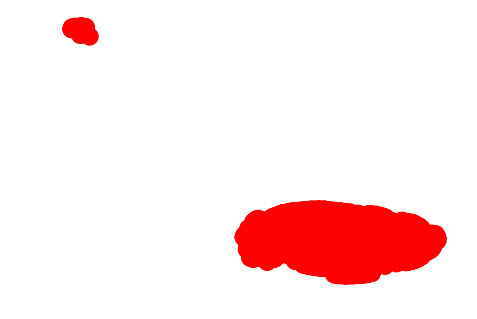

In [5]:
Authors_Subject_List = []
subjects = Authors_Subject.tolist()
subjects = [str(line) for line in subjects]
Authors_Subjects_List = [subject.split('\n') for subject in subjects]
for x in Authors_Subjects_List:
    if '' in x:
        x.remove('')    
ASGraph = CreateGraph(Authors_ID_Num,Authors_Subjects_List)

In [8]:
"""
Going through the list of Authors (List_of_IDs) and comparing them with 
the authors from the authors list!

Addendum:
Created a file where I can now create an author-subject graph and then 
use that as a search engine of sorts
"""


for Authors_per_Article in List_of_IDs:
    List_Of_Known_Authors = []
    List_Of_The_Unknown = []
    for Each_ID in Authors_per_Article:
        if Each_ID in Authors_ID_Num.values:
            List_Of_Known_Authors.append(Each_ID)
            #print(Each_ID)
        else:
            List_Of_The_Unknown.append(Each_ID)
            #print('Sorry, this person isnt on file!')
    #print(List_Of_Known_Authors)
    for Known_Person in List_Of_Known_Authors:
        Known_Subjects = FindPerson(ASGraph,Known_Person)
        
              
        #continue
    print(Known_Subjects)


[55953963500, 57204138183, 57204137511, 55522307000]
{'Engineering': {}, 'Earth and Planetary Sciences': {}, 'Computer Science': {}, 'Environmental Science': {}, 'Physics and Astronomy': {}, 'Materials Science': {}, 'Agricultural and Biological Sciences': {}, 'Mathematics': {}, 'Chemical Engineering': {}, 'Arts and Humanities': {}, 'Psychology': {}, 'Social Sciences': {}, 'Chemistry': {}, 'Neuroscience': {}}
[]
{'Engineering': {}, 'Earth and Planetary Sciences': {}, 'Computer Science': {}, 'Environmental Science': {}, 'Physics and Astronomy': {}, 'Materials Science': {}, 'Agricultural and Biological Sciences': {}, 'Mathematics': {}, 'Chemical Engineering': {}, 'Arts and Humanities': {}, 'Psychology': {}, 'Social Sciences': {}, 'Chemistry': {}, 'Neuroscience': {}}
[57191226503, 13612149400, 57203857161, 7005893770]
{'Chemistry': {}, 'Materials Science': {}, 'Physics and Astronomy': {}, 'Engineering': {}, 'Biochemistry, Genetics and Molecular Biology': {}, 'Chemical Engineering': {}, 'Im